In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [9]:
df= pd.read_excel(r"C:\Users\Arunkumar Shanmugam\Downloads\archive (1)\Mall Customers.xlsx")
df.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
# Selecting relevant features: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Train DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)


In [15]:
dbscan

DBSCAN()

In [16]:
# Count the number of clusters (excluding noise points labeled as -1)
num_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'].values else 0)

# Calculate silhouette score (only if more than 1 cluster is found)
if num_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")


Silhouette Score: 0.3504


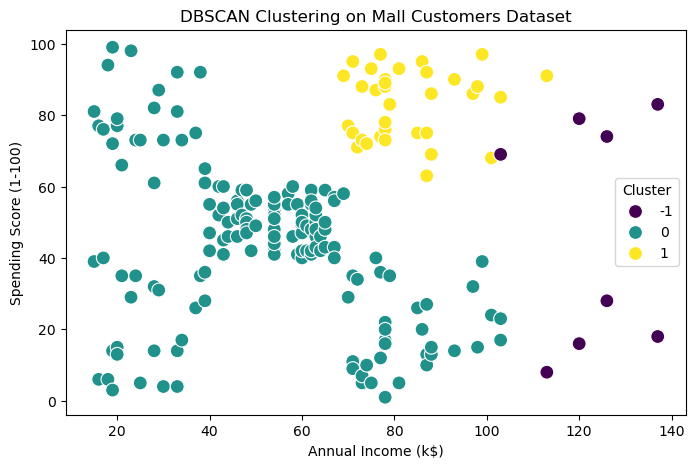

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering on Mall Customers Dataset")
plt.legend(title="Cluster")
plt.show()
